In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
data = pd.read_excel(r'C:\Users\musih\project1\book.xlsx')
data.head(5)

,DistrictName,LocationType,PostalCode,ReceivedTime,PickupTime,OnHoldTime,OnHoldReason,RescheduleDate,Status,CODAmount,...,SumOnhold,DeliveryAttempts,BulkyType,SLATargetDate,TimetoSLA,PaymentMethod,CurrentStation,AssignTime,DestinationHub,Zone
0,SUNGKAI UTARA,Home,34555,2022-06-04 20:39:00,2022-06-05 09:55:00,2022-06-05 11:28:00,Address Is Close,0,OnHold,474830,...,1,1,Non-Bulky,2022-06-05 00:00:00,overtime,COD,Sungkai Utara Hub,2022-06-05 09:55:00,Sungkai Utara Hub,NaN
1,TEMBALANG,Office,50272,2022-06-14 05:48:00,2022-06-14 10:33:00,2022-06-14 10:35:00,Normal,0,OnHold,0,...,1,1,Non-Bulky,Pending,NaN,NON-COD,Banyumanik Hub,2022-06-14 10:33:00,Banyumanik Hub,BMK-B-09
2,GAMPING,NaN,55592,2022-06-08 13:43:00,2022-06-09 10:21:00,2022-06-09 10:23:00,Damaged Item,0,OnHold,0,...,1,1,Non-Bulky,2022-06-10 00:00:00,overtime,NON-COD,Sleman Hub,2022-06-09 10:21:00,Sleman Hub,SLE-A-23
3,RANAH PESISIR,Home,25666,2022-06-14 03:25:00,2022-06-15 09:00:00,2022-06-15 17:03:00,Buyer Not Contactable,0,OnHold,99601,...,1,1,Non-Bulky,2022-06-14 00:00:00,overtime,COD,Kambang Hub,2022-06-15 09:00:00,Kambang Hub,NaN
4,KOTO VII,NaN,27562,2022-06-10 17:46:00,2022-06-15 09:03:00,2022-06-15 23:07:00,Insufficient Time,0,OnHold,24885,...,3,3,Non-Bulky,Pending,NaN,COD,Sijunjung Hub,2022-06-15 09:03:00,Sijunjung Hub,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13455 entries, 0 to 13454
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DistrictName      13455 non-null  object        
 1   LocationType      10397 non-null  object        
 2   PostalCode        13442 non-null  object        
 3   ReceivedTime      13443 non-null  datetime64[ns]
 4   PickupTime        13455 non-null  datetime64[ns]
 5   OnHoldTime        13455 non-null  datetime64[ns]
 6   OnHoldReason      13455 non-null  object        
 7   RescheduleDate    13455 non-null  int64         
 8   Status            13455 non-null  object        
 9   CODAmount         13455 non-null  int64         
 10  OrderAccount      13455 non-null  object        
 11  OriginalASF       13455 non-null  int64         
 12  RoundingASF       13360 non-null  float64       
 13  SumOnhold         13455 non-null  int64         
 14  DeliveryAttempts  1345

In [75]:
data.isna().sum()

DistrictName           0
LocationType        3058
PostalCode            13
ReceivedTime          12
PickupTime             0
OnHoldTime             0
OnHoldReason           0
RescheduleDate         0
Status                 0
CODAmount              0
OrderAccount           0
OriginalASF            0
RoundingASF           95
SumOnhold              0
DeliveryAttempts       0
BulkyType           4259
SLATargetDate          0
TimetoSLA           6250
PaymentMethod          0
CurrentStation         0
AssignTime             0
DestinationHub         0
Zone                2441
dtype: int64

In [76]:
data = data.dropna()

In [77]:
data.isna().sum()

DistrictName        0
LocationType        0
PostalCode          0
ReceivedTime        0
PickupTime          0
OnHoldTime          0
OnHoldReason        0
RescheduleDate      0
Status              0
CODAmount           0
OrderAccount        0
OriginalASF         0
RoundingASF         0
SumOnhold           0
DeliveryAttempts    0
BulkyType           0
SLATargetDate       0
TimetoSLA           0
PaymentMethod       0
CurrentStation      0
AssignTime          0
DestinationHub      0
Zone                0
dtype: int64

In [78]:
data.duplicated().sum()


0

In [79]:
# FIND WHAT ARE DESTINATION HUB DOMINATION ONHOLD PARCEL
top10_hub = (data
            .groupby('DestinationHub')
            .agg(total_parcel=('SumOnhold','count'))
            .reset_index()
            .sort_values('total_parcel',ascending=False)
            .head(10)
            )
top10_hub

,DestinationHub,total_parcel
29,Batam Hub,202
10,Banda Aceh Hub,126
182,Padang Hub,96
164,Medan Helvetia Hub,60
163,Medan Amplas Hub,55
184,Palangka Raya Hub,49
72,Cirebon Hub,46
15,Bandung Timur Hub,43
270,Tamansari Hub,39
19,Banjarmasin Hub,39


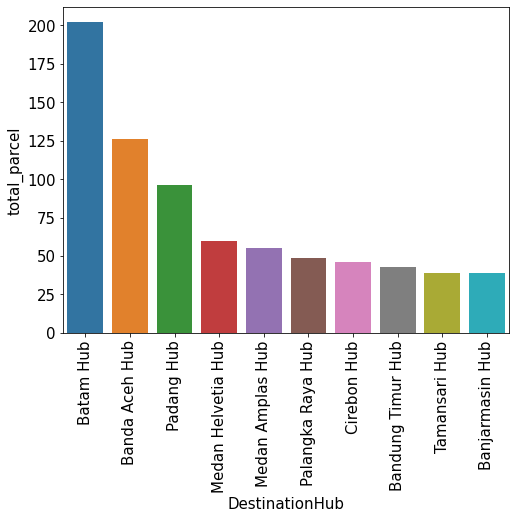

In [80]:
# visualize it
plt.figure(figsize=(8,6))
plt.rc('font', size=15) #configure size font
sns.barplot(data=top10_hub, x='DestinationHub', y='total_parcel')
plt.xticks(rotation=90)
plt.show()

In [81]:
# FIND BEST 10 REASON ONHOLD DOMINATION PERIODE 1 - 15 JUNI 2022
top10_onhold = (data
            .groupby('OnHoldReason')
            .agg(total_parcel=('SumOnhold','count'))
            .reset_index()
            .sort_values('total_parcel',ascending=False)
            .head(10)
            )
top10_onhold

,OnHoldReason,total_parcel
5,Damaged Item,839
15,Waiting Confirmation,288
2,Buyer Not Contactable,285
3,Buyer Not On Location,255
9,Item Lost,242
8,Insufficient Time,205
6,Inaccessible Location,150
7,Incomplete Address,148
4,Buyer Reschedule,122
13,Rejected By User,105


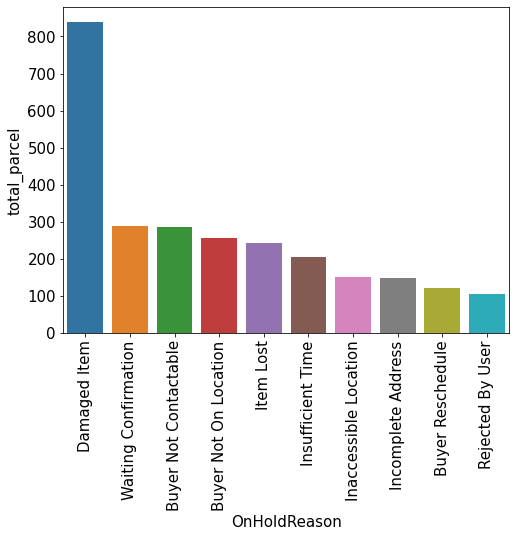

In [83]:
# visualize it
plt.figure(figsize=(8,6))
plt.rc('font', size=15) #configure size font
sns.barplot(data=top10_onhold, x='OnHoldReason', y='total_parcel')
plt.xticks(rotation=90)
plt.show()

In [144]:
import plotly.express as px #Importing our graphical and data extracting packages

values = data['OnHoldReason'].value_counts() #Counting the unqiue values frequency
names = data['OnHoldReason'].value_counts()

fig = px.pie(data, values=values, names=names, title = "REASON ONHOLD")
print(values) #print our values
py.iplot(fig, show_link = False)

Damaged Item                839
Waiting Confirmation        288
Buyer Not Contactable       285
Buyer Not On Location       255
Item Lost                   242
Insufficient Time           205
Inaccessible Location       150
Incomplete Address          148
Buyer Reschedule            122
Rejected By User            105
Transfer to Other Driver     70
No Payment Received          48
Address Is Close             31
Misroute                     24
Address Not Match            24
Normal                        2
Name: OnHoldReason, dtype: int64


In [143]:
# WHERE DISTRICT DOMINATION ONHOLD PARCEL
top10_distric = (data
            .groupby('DistrictName')
            .agg(total_parcel=('SumOnhold','count'))
            .reset_index()
            .sort_values('total_parcel',ascending=False)
            .head(10)
            )
top10_distric

,DistrictName,total_parcel
56,BATAM KOTA,54
275,JEKAN RAYA,47
400,LUBUK BAJA,44
272,JAYA BARU,35
561,PENJARINGAN,32
43,BANJARMASIN TIMUR,30
22,BAITURRAHMAN,30
361,KOTO TANGAH,28
382,LAHAT,23
401,LUBUK BEGALUNG,22


In [84]:
# WHETHER BULKY OR NON BULKY PACKAGES ARE MORE DOMINANT
data['Paket'] = np.where(data['BulkyType']=='Bulky','Bulky','Non-Bulky')
data.head(10)

,DistrictName,LocationType,PostalCode,ReceivedTime,PickupTime,OnHoldTime,OnHoldReason,RescheduleDate,Status,CODAmount,...,DeliveryAttempts,BulkyType,SLATargetDate,TimetoSLA,PaymentMethod,CurrentStation,AssignTime,DestinationHub,Zone,Paket
6,TELANAIPURA,Home,36121,2022-06-13 04:48:00,2022-06-14 14:29:00,2022-06-14 14:56:00,Inaccessible Location,0,OnHold,46762,...,1,Non-Bulky,2022-06-13 00:00:00,overtime,COD,Kota Baru Hub,2022-06-14 14:29:00,Kota Baru Hub,KBR-A-04,Non-Bulky
9,BABELAN,Home,17610,2022-06-11 15:26:00,2022-06-12 01:38:00,2022-06-12 01:41:00,Damaged Item,0,OnHold,0,...,1,Non-Bulky,2022-06-13 00:00:00,overtime,NON-COD,Tambun Utara Hub,2022-06-12 01:38:00,Tambun Utara Hub,TBU-C-11,Non-Bulky
10,TAMBORA,Home,11330,2022-06-05 09:47:00,2022-06-06 09:30:00,2022-06-06 18:31:00,Damaged Item,0,OnHold,22660,...,1,Non-Bulky,2022-06-07 00:00:00,overtime,COD,Tamansari Hub,2022-06-06 09:30:00,Tamansari Hub,TMS-A-20,Non-Bulky
11,TAWANG,Home,46115,2022-06-15 06:19:00,2022-06-15 16:45:00,2022-06-15 16:45:00,Damaged Item,0,OnHold,0,...,1,Non-Bulky,2022-06-10 00:00:00,overtime,NON-COD,Tasikmalaya Hub,2022-06-15 16:45:00,Tasikmalaya Hub,TSK-C-06,Non-Bulky
17,JEKAN RAYA,Home,73112,2022-06-08 19:07:00,2022-06-15 02:19:00,2022-06-15 09:11:00,Waiting Confirmation,0,OnHold,0,...,2,Non-Bulky,2022-06-09 00:00:00,overtime,NON-COD,Palangka Raya Hub,2022-06-15 02:19:00,Palangka Raya Hub,PKY-A-35,Non-Bulky
19,MEDAN AMPLAS,Home,20147,2022-06-06 22:46:00,2022-06-13 18:31:00,2022-06-13 23:10:00,Buyer Not Contactable,0,OnHold,170943,...,3,Non-Bulky,2022-06-07 00:00:00,overtime,COD,Medan Amplas Hub,2022-06-13 18:31:00,Medan Amplas Hub,ATC-A-07,Non-Bulky
20,PENJARINGAN,Office,14440,2022-06-02 00:24:00,2022-06-04 09:09:00,2022-06-04 09:15:00,Damaged Item,0,OnHold,0,...,3,Non-Bulky,2022-06-02 00:00:00,overtime,NON-COD,Penjaringan Hub,2022-06-04 09:09:00,Penjaringan Hub,PJR-A-04,Non-Bulky
22,KEBAYORAN LAMA,Home,12240,2022-06-09 03:59:00,2022-06-10 15:23:00,2022-06-10 15:26:00,Buyer Not Contactable,0,OnHold,8034,...,2,Non-Bulky,2022-06-10 00:00:00,overtime,COD,Kebayoran Lama Hub,2022-06-10 15:23:00,Kebayoran Lama Hub,KBL-A-09,Non-Bulky
23,LARANGAN,Home,15155,2022-06-15 12:45:00,2022-06-15 18:10:00,2022-06-15 18:11:00,Damaged Item,0,OnHold,0,...,1,Non-Bulky,2022-06-17 00:00:00,21.6 H,NON-COD,Pondok Aren Hub,2022-06-15 18:10:00,Pondok Aren Hub,PDA-A-09,Non-Bulky
28,TANAH ABANG,Home,10220,2022-06-05 06:32:00,2022-06-05 11:19:00,2022-06-05 11:19:00,Damaged Item,0,OnHold,0,...,1,Non-Bulky,2022-06-07 00:00:00,21.8 H,NON-COD,Tanah Abang Hub,2022-06-05 11:19:00,Tanah Abang Hub,TNB-A-16,Non-Bulky


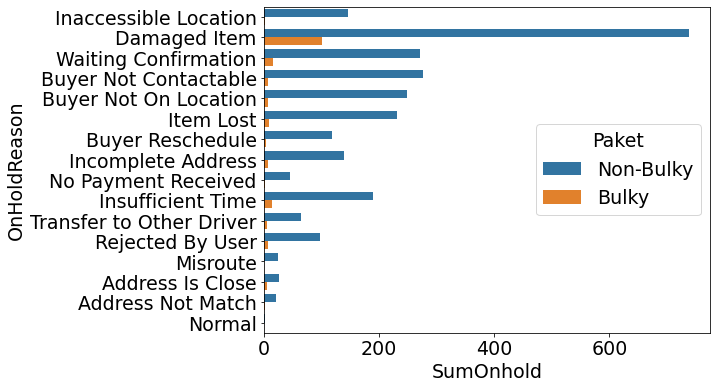

In [85]:
plt.figure(figsize=(8,6))
plt.rc('font', size=19) #configure size font
sns.barplot(x=data['SumOnhold'],
            y=data['OnHoldReason'],
            hue=data['Paket'],
            estimator = len
           )